#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
# 1
# The number of rows and columns
df.shape


(148654, 13)

In [4]:
# 1
# Data types of each column
df.dtypes


Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
# 1
# Missing values in each column
df.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
# 2
# Descriptive Statistics
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].describe()


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


In [7]:
# 2
# Calculate mode separately as it's not included in describe()
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].mode().iloc[0]


BasePay                0.00
OvertimePay            0.00
OtherPay               0.00
Benefits               0.00
TotalPay               0.00
TotalPayBenefits    7959.18
Name: 0, dtype: float64

In [9]:
# 3
# Handling missing values
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(0, inplace=True)

# Drop 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)


**BasePay**, **OvertimePay**, **OtherPay**:

Since the number of missing values is relatively small, one approach could be to fill these missing values with the mean or median of each respective column. This helps to maintain the statistical characteristics of the data.

**Benefits**:

The 'Benefits' column has a significant number of missing values. One approach is to fill missing values with 0, assuming that employees with missing benefits data did not receive additional benefits. Alternatively, you might want to explore more sophisticated imputation methods or model-based imputations based on other available information.

**Notes** and **Status**:

The 'Notes' and 'Status' columns have missing values for all rows and might not provide meaningful information. Considering their high percentage of missing values, you may choose to drop these columns entirely.

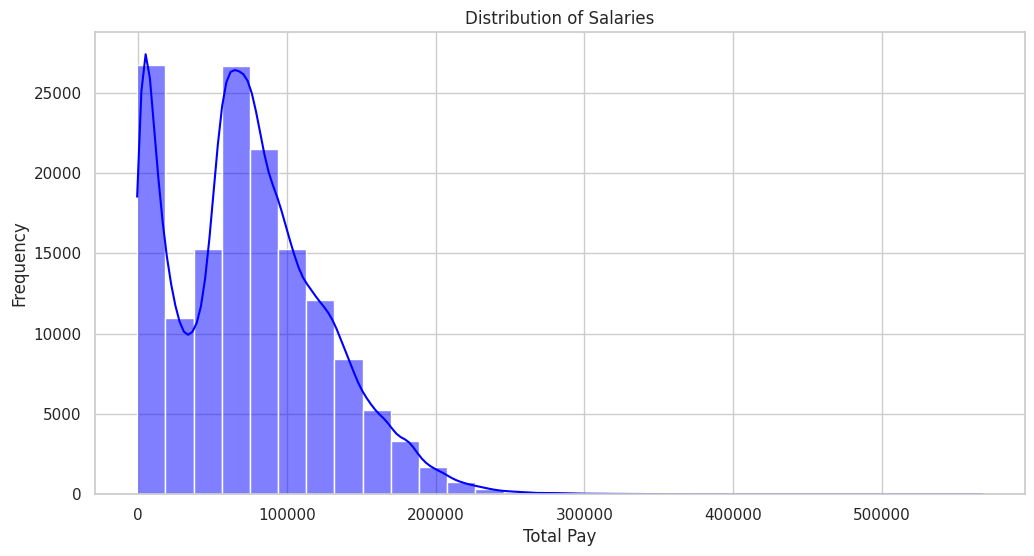

In [10]:
# 4
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram for the distribution of salaries
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()


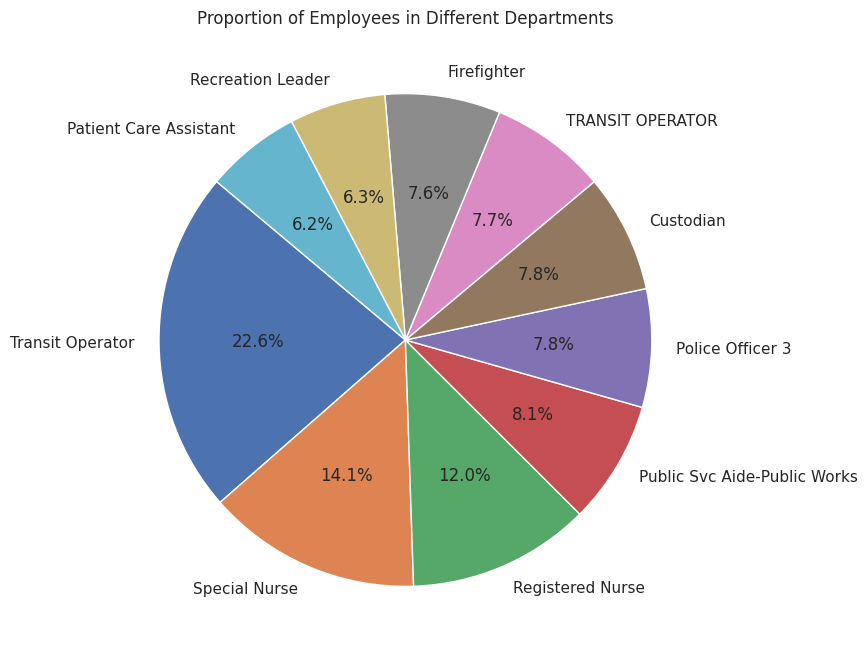

In [11]:
# 4
# Pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [12]:
# 5
# Group the data by a specific column
grouped_by_year = df.groupby('Year')

# Average salaries for each group
average_salaries_by_year = grouped_by_year['TotalPay'].mean()
average_salaries_by_year


Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

In [13]:
# 5
# Grouping by 'JobTitle' and calculating average salaries
grouped_by_job_title = df.groupby('JobTitle')
average_salaries_by_job_title = grouped_by_job_title['TotalPay'].mean()
average_salaries_by_job_title


JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2159, dtype: float64

In [14]:
# 6
# Simple Correlation Analysis
df['TotalPay'].corr(df['BasePay'])


0.9505142922626454

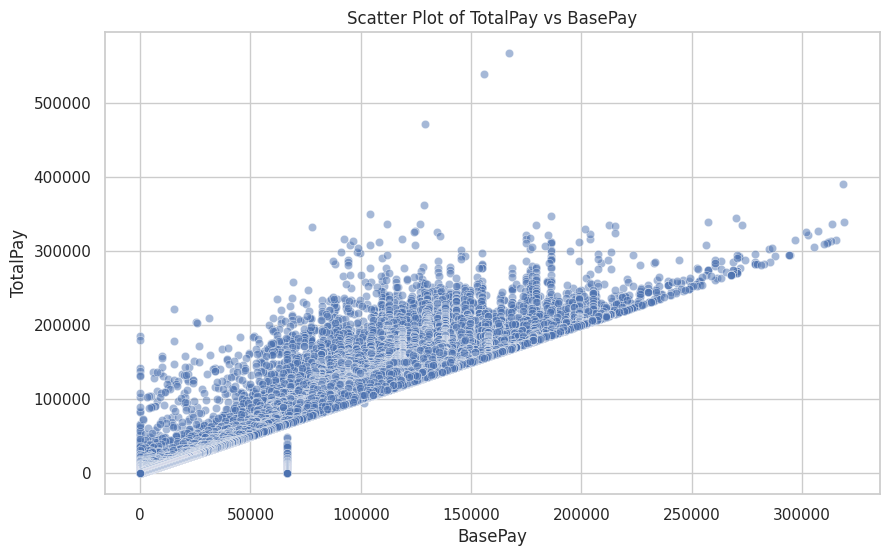

In [15]:
# 6
# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, alpha=0.5)
plt.title('Scatter Plot of TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

**Summary of Insights:**

**1. Basic Data Exploration:**
   - The dataset consists of 148,654 rows and 13 columns, including information about employee names, job titles, and compensation details.
   - Key columns include 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'TotalPay,' 'TotalPayBenefits,' and 'Year.'
   - Missing values were identified in several columns, and a data cleaning strategy was applied to handle them.

**2. Descriptive Statistics:**
   - Descriptive statistics were calculated for key numerical columns such as 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'TotalPay,' and 'TotalPayBenefits.'
   - Mode values were identified for each numerical column.

**3. Data Cleaning:**
   - Missing values in 'BasePay,' 'OvertimePay,' 'OtherPay,' and 'Benefits' were handled through mean imputation and zero filling.
   - Columns 'Notes' and 'Status' with a high percentage of missing values were dropped.

**4. Basic Data Visualization:**
   - Histograms were created to visualize the distribution of 'TotalPay,' providing insights into the salary distribution.
   - A pie chart represented the proportion of employees in different departments ('JobTitle').

**5. Grouped Analysis:**
   - Data was grouped by 'Year,' and the average salaries for each year were calculated.
   - A similar analysis was performed by grouping the data by 'JobTitle' to understand average salaries across different job titles.

**6. Simple Correlation Analysis:**
   - A strong positive correlation (0.95) was identified between 'TotalPay' and 'BasePay,' suggesting that total pay is highly correlated with the base pay component.

**7. Summary of Findings:**
   - Average salaries vary significantly across different job titles.
   - The correlation analysis indicates a strong relationship between total pay and base pay, suggesting that these two components are closely linked.

# Good Luck!